<a href="https://colab.research.google.com/github/siddhardhram/Energy-Theft-Detection/blob/main/classfication_problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importing packages
import numpy as np
import pandas as pd

In [ ]:
# Reading dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dataset/Energy_Theft_Detection.csv')
df.head()

,Customer_ID,Age,Energy_Consumption,Location,Time_of_Use,Previous_Bills,Average_Temperature,Energy_Usage_History,Payment_Method,Consumption_Type
0,349674fd-7878-4927-9b5e-a99ec45cb77e,38,805.0,Suburban,Night,263.0,16.869353,Abnormal,Debit Card,Residential
1,3427bdd4-d1f7-44a6-99c4-8735eb81d8a7,38,721.0,Rural,Day,278.0,15.727896,Abnormal,Cash,Residential
2,97a417eb-8559-491e-88d0-dc8c6e7b6711,41,391.0,Urban,Day,199.0,25.542912,Abnormal,Credit Card,Residential
3,e2595c2f-920d-4117-a92e-0266ed8fdfb0,30,154.0,Urban,Day,242.0,34.635084,Normal,Debit Card,Commercial
4,243ee6de-7424-41ef-89c2-42065d05ac15,31,545.0,Rural,Day,499.0,16.864784,Abnormal,Debit Card,Residential


In [ ]:
# See the no. of rows and columns
df.shape

(1050, 10)

In [ ]:
#printing all columns
data_cols = df.columns.tolist()
print(data_cols)

['Customer_ID', 'Age', 'Energy_Consumption', 'Location', 'Time_of_Use', 'Previous_Bills', 'Average_Temperature', 'Energy_Usage_History', 'Payment_Method', 'Consumption_Type']


In [ ]:
# Display data type of each feature
df.dtypes

,0
Customer_ID,object
Age,int64
Energy_Consumption,float64
Location,object
Time_of_Use,object
Previous_Bills,float64
Average_Temperature,float64
Energy_Usage_History,object
Payment_Method,object
Consumption_Type,object


In [ ]:
df.describe()

,Age,Energy_Consumption,Previous_Bills,Average_Temperature
count,1050.000000,1008.000000,1018.000000,1040.000000
mean,47.824762,555.231151,263.918468,24.938662
std,17.614064,257.223038,130.103220,5.723960
min,18.000000,100.000000,50.000000,15.003251
25%,34.000000,332.750000,149.000000,20.080359
50%,47.000000,559.500000,265.000000,24.975350
75%,63.000000,781.250000,375.000000,29.739189
max,79.000000,999.000000,499.000000,34.973531


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Customer_ID           1050 non-null   object 
 1   Age                   1050 non-null   int64  
 2   Energy_Consumption    1008 non-null   float64
 3   Location              1050 non-null   object 
 4   Time_of_Use           1050 non-null   object 
 5   Previous_Bills        1018 non-null   float64
 6   Average_Temperature   1040 non-null   float64
 7   Energy_Usage_History  1050 non-null   object 
 8   Payment_Method        1050 non-null   object 
 9   Consumption_Type      1050 non-null   object 
dtypes: float64(3), int64(1), object(6)
memory usage: 82.2+ KB


In [ ]:
# find the null values
df.isnull().sum()

,0
Age,0
Energy_Consumption,0
Location,0
Time_of_Use,0
Previous_Bills,0
Average_Temperature,0
Energy_Usage_History,0
Payment_Method,0
Consumption_Type,0


In [ ]:
# Remove unwanted columns
df.drop(columns=['Customer_ID'], inplace=True)  # specify the columns to remove

In [ ]:
# Fill numerical columns with mean and categorical columns with the mode
num_columns = df.select_dtypes(include=['float64', 'int64']).columns
cat_columns = df.select_dtypes(include=['object']).columns
cat_columns

Index(['Location', 'Time_of_Use', 'Energy_Usage_History', 'Payment_Method',
       'Consumption_Type'],
      dtype='object')

In [ ]:
df[num_columns] = df[num_columns].fillna(df[num_columns].mean())  # numerical columns
df[cat_columns] = df[cat_columns].fillna(df[cat_columns].mode().iloc[0])  # categorical columns

In [ ]:
# fill the missing values for numerical terms - mean
#df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())

In [ ]:
# fill the missing values for categorical terms - mode
#df['Gender'] = df["Gender"].fillna(df['Gender'].mode()[0])

In [ ]:
# find the null values
df.isnull().sum()

,0
Age,0
Energy_Consumption,0
Location,0
Time_of_Use,0
Previous_Bills,0
Average_Temperature,0
Energy_Usage_History,0
Payment_Method,0
Consumption_Type,0


In [ ]:
# Encode categorical features using Label Encoding
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for column in cat_columns:
    df[column] = label_encoder.fit_transform(df[column])
df.head()

,Age,Energy_Consumption,Location,Time_of_Use,Previous_Bills,Average_Temperature,Energy_Usage_History,Payment_Method,Consumption_Type
0,38,805.0,1,1,263.0,16.869353,0,2,1
1,38,721.0,0,0,278.0,15.727896,0,0,1
2,41,391.0,2,0,199.0,25.542912,0,1,1
3,30,154.0,2,0,242.0,34.635084,1,2,0
4,31,545.0,0,0,499.0,16.864784,0,2,1


In [ ]:
# Scale numerical features with MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[num_columns] = scaler.fit_transform(df[num_columns])

In [24]:
# Split data into train and test sets
# replace 'target_column' with your target column name
X = df.drop('Energy_Usage_History', axis=1)  # -- independent variable
y = df['Energy_Usage_History'] # -- dependent variable

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
# Train Logistic Regression model
from sklearn.linear_model import LogisticRegression
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [26]:
# Evaluate Logistic Regression model
from sklearn.metrics import accuracy_score, confusion_matrix
logreg_pred = logreg_model.predict(X_test)
logreg_accuracy = accuracy_score(y_test, logreg_pred)
logreg_conf_matrix = confusion_matrix(y_test, logreg_pred)

In [27]:
print("Logistic Regression Accuracy:", logreg_accuracy)
print("Logistic Regression Confusion Matrix:\n", logreg_conf_matrix)

Logistic Regression Accuracy: 0.46190476190476193
Logistic Regression Confusion Matrix:
 [[46 49]
 [64 51]]


In [28]:
#Train Random Forest Classifier model
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [29]:
# Evaluate Random Forest Classifier model
rf_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_conf_matrix = confusion_matrix(y_test, rf_pred)

In [35]:
print("Random Forest Accuracy:", rf_accuracy)
print("Random Forest Confusion Matrix:\n", rf_conf_matrix)

Random Forest Accuracy: 0.48095238095238096
Random Forest Confusion Matrix:
 [[49 46]
 [63 52]]


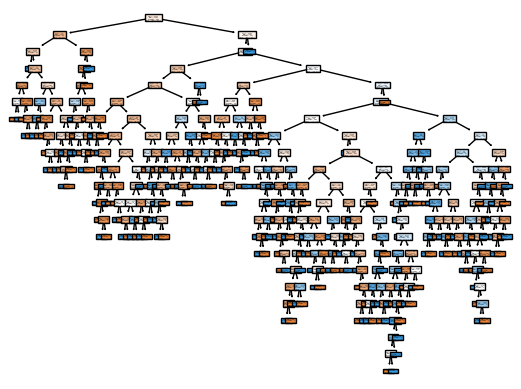

In [31]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Plotting the first tree in the forest
plot_tree(rf_model.estimators_[0], filled=True)
plt.show()

In [32]:
# Select the best model
best_model = logreg_model if logreg_accuracy > rf_accuracy else rf_model

In [33]:
# Save the best model as a .pkl file
import pickle

with open('best_model.pkl', 'wb') as file:
    pickle.dump(best_model, file)

print("Best model saved as 'best_model.pkl'")

Best model saved as 'best_model.pkl'
